# Machine Learning Clustering

Este é um exercício acadêmico para entender e aplicar o uso de de Machine Learning não supervisionado para analisar e encontrar padrões. Neste caso utilizaremos Clustering para achar padrões entre países de um dataset.

Origem do dataset: [Kaggle](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

# Parte 1 Infraestrutura

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. Você está rodando em Python 3.9+
   > Por questão de compatibilidades com as bibliotecas, executei tudo usando o `Python 3.10`

2. Você está usando um ambiente virtual: Virtualenv ou Anaconda
   > `conda create --name clustering python=3.10`


3. Todas as bibliotecas usadas nesses exercícios estão instaladas em um ambiente virtual específico
   > * Para rodar em ambiente local: `pip install numpy==1.26.4 pandas matplotlib scikit-learn jupyter scipy scikit-learn-extra`
   > * Se for usar o Google Colab, só precisa deste: `!pip install scikit-learn-extra`


4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
   > `pip freeze > requirements.txt`

5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).
   > [Github público: Clustering](https://github.com/edermartins/ia-lab/tree/main/clustering)

## Para executar no Google Colab

In [ ]:
!pip install scikit-learn-extra

## Import das bibliotecas

In [2]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_extra.cluster import KMedoids

# Parte 2 Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
   > Dados disponíveis em [Github: Country-data.csv](#)

2. Quantos países existem no dataset?
   > 167 países

3. Mostre por gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
   > Os dados serão normalizados. Para este exercício eu utilizer o `sklearn.preprocessing.StandardScaler`


4. Realize o pré-processamento adequado dos dados.

In [5]:
# Carregar os dados

# Verifica se existe o arquivo local
url = './data/Country-data.csv'
if not os.path.isfile(url):
  # Caso contrário vai buscar no github publico
  url = 'https://raw.githubusercontent.com/datasets/country-data/master/data/countries.csv'

In [7]:
# Cria o dataset
df = pd.read_csv(url)
# Cópia do dataset sem a variável texto 'country'
X_vars = df.drop(["country"],axis=1).copy()

In [8]:
# Normalização dos dados para a clusterização
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_vars)

## Analisando os dados

### Visualizando algumas informações do Dataset

In [14]:
# Mostra as primeiras linhas do dataset original
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
# Exibindo o dataset normalizado
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [10]:
# Quantidade de países no dataset
num_paises = df['country'].nunique()
print(f"Total de países: {num_paises}")

Total de países: 167


In [16]:
# Mostrar estatísticas descritivas para entender a faixa dinâmica das variáveis
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [17]:
# Verificando campos nulos e analisando a estrutura do dataset
print("Quantidade de campos nulos:", df.duplicated().sum())
df.info()

Quantidade de campos nulos: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Análise Exploratória

#### Variáveis de Interesse

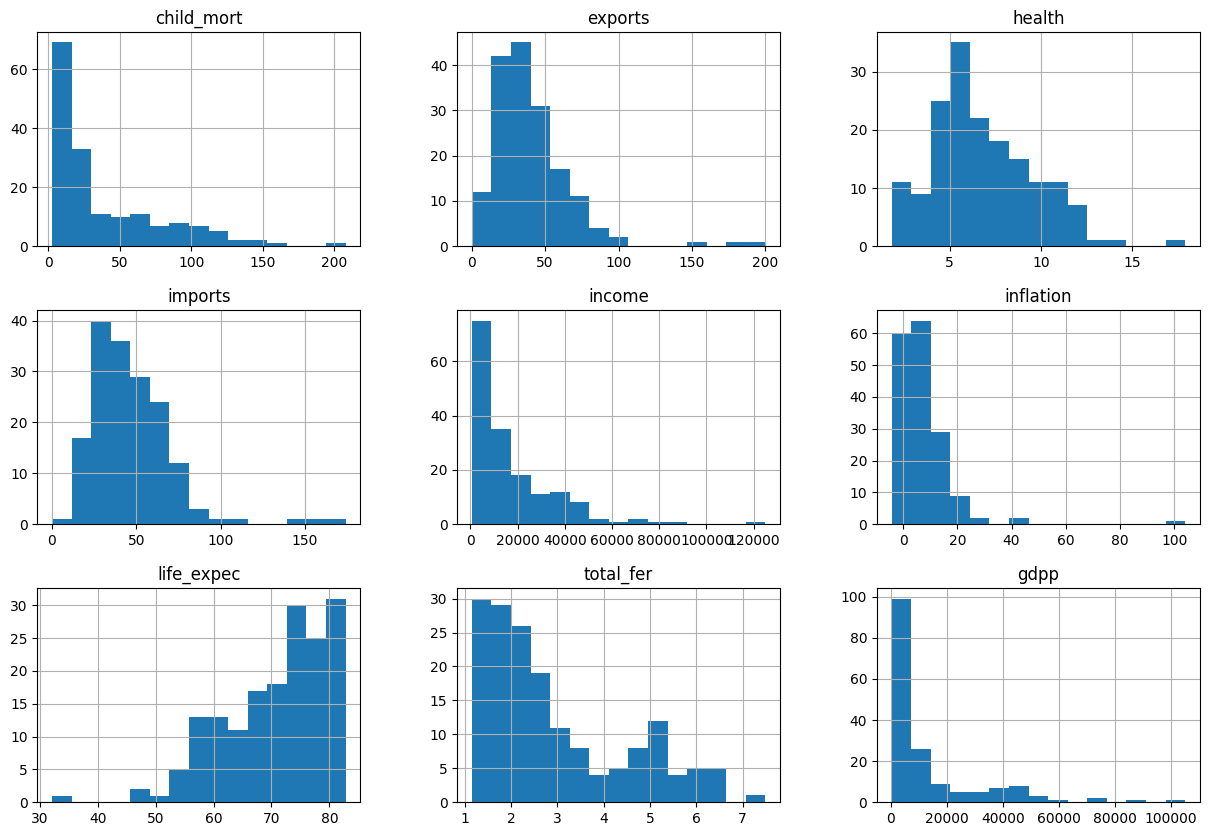

In [18]:
# Visualizando as variáveis de interesse
X_vars.hist(bins=15, figsize=(15, 10))
plt.show()

### Método do Cotovelo

#### K-Média

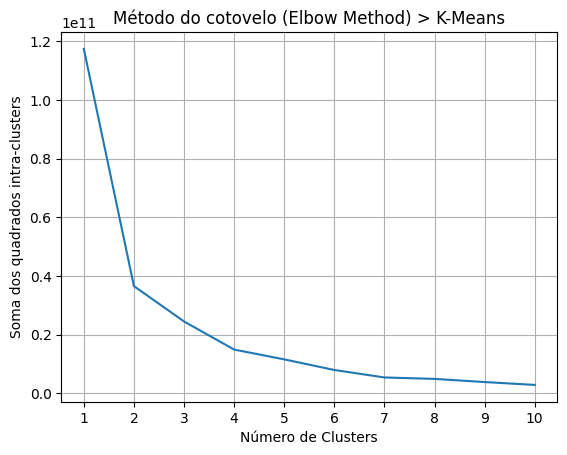

In [20]:
# Aplicando o Método do cotovelo (Elbow Method) > K-Média
elbow_graph=[]
for i in range(1,11):
    kmeans_result=KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans_result.fit(X_vars)
    elbow_graph.append(kmeans_result.inertia_)
plt.plot(range(1, 11), elbow_graph)
plt.title('Método do cotovelo (Elbow Method) > K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

#### K-Medoides

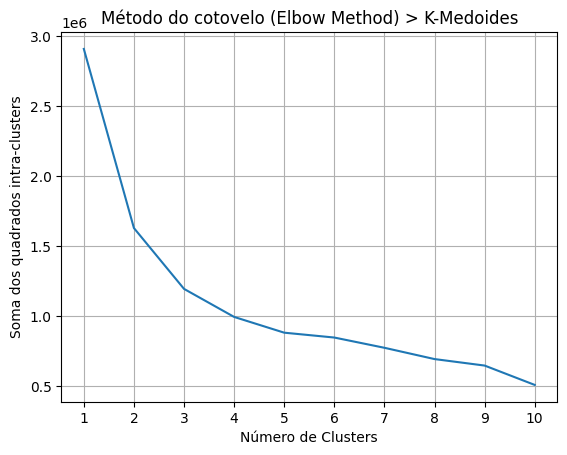

In [23]:
# Aplicando o Método do cotovelo (Elbow Method) > K-Medoide
elbow_graph=[]
for i in range(1,11):
    kMedoids_result=KMedoids(n_clusters=i, init='k-medoids++', random_state= 42)
    kMedoids_result.fit_predict(X_vars)
    elbow_graph.append(kMedoids_result.inertia_)
plt.plot(range(1, 11), elbow_graph)
plt.title('Método do cotovelo (Elbow Method) > K-Medoides')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Parte 3 Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
   * K-Médias

In [27]:
# K-Médias
kmeans_result = KMeans(n_clusters=3, random_state=42)
y_vars = kmeans_result.fit_predict(df_scaled)
X_vars_kmeans = X_vars.copy()
X_vars_kmeans['Cluster_KMeans'] = kmeans_result.labels_

In [28]:
# Analisando a distribuição dos clusters (K-Médias)
cluster_counts = X_vars_kmeans['Cluster_KMeans'].value_counts()
print("Distribuição dos clusters (K-Médias):")
print(cluster_counts)

Distribuição dos clusters (K-Médias):
Cluster_KMeans
0    86
2    45
1    36
Name: count, dtype: int64


In [29]:
# Analisando a distribuição das dimensões em cada grupo (K-Médias)
cluster_means = X_vars_kmeans.groupby('Cluster_KMeans').mean()
print("Distribuição das dimensões em cada grupo (K-Médias):")
print(cluster_means)

Distribuição das dimensões em cada grupo (K-Médias):
                child_mort    exports    health    imports        income  \
Cluster_KMeans                                                             
0                22.456977  40.273128  6.251047  47.362394  12321.744186   
1                 5.000000  58.738889  8.807778  51.491667  45672.222222   
2                95.106667  28.602444  6.301111  42.306667   3539.844444   

                inflation  life_expec  total_fer          gdpp  
Cluster_KMeans                                                  
0                7.720884   72.566279   2.340349   6461.767442  
1                2.671250   80.127778   1.752778  42494.444444  
2               11.986778   59.055556   5.065333   1766.711111  


   * Clusterização Hierárquica

In [31]:
# Clusterização Hierárquica através da função scipy.cluster.hierarchy.linkage do SciPy
linked = linkage(df_scaled, method='ward')

2. Para os resultados, do K-Médias:
    * Interprete cada um dos clusters obtidos citando:
        * Qual a distribuição das dimensões em cada grupo

In [34]:
# Analisando a distribuição das dimensões em cada grupo (K-Médias)
cluster_means = X_vars_kmeans.groupby('Cluster_KMeans').mean()
print("Distribuição das dimensões em cada grupo (K-Médias):")
print(cluster_means)

Distribuição das dimensões em cada grupo (K-Médias):
                child_mort    exports    health    imports        income  \
Cluster_KMeans                                                             
0                22.456977  40.273128  6.251047  47.362394  12321.744186   
1                 5.000000  58.738889  8.807778  51.491667  45672.222222   
2                95.106667  28.602444  6.301111  42.306667   3539.844444   

                inflation  life_expec  total_fer          gdpp  
Cluster_KMeans                                                  
0                7.720884   72.566279   2.340349   6461.767442  
1                2.671250   80.127778   1.752778  42494.444444  
2               11.986778   59.055556   5.065333   1766.711111  


* O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
   > ```
   > Cluster 0 é melhor representado por: Suriname
   > Cluster 1 é melhor representado por: Iceland
   > Cluster 2 é melhor representado por: Guinea
   > ```

In [36]:
# Exibir os países que representam cada cluster (K-Médias)
def calcular_pais_representativo(cluster_num, df, df_scaled, kmeans):
    # Gera um índice do cluster n
    cluster_indices = df[X_vars_kmeans['Cluster_KMeans'] == cluster_num].index
    # Resupera o elementro central de cada cluster, procurando o mais próximo através da distãncia do centro
    cluster_center = kmeans_result.cluster_centers_[cluster_num]
    distancias = np.linalg.norm(df_scaled[cluster_indices] - cluster_center, axis=1)
    pais_representativo_idx = cluster_indices[np.argmin(distancias)]
    return df.loc[pais_representativo_idx, 'country']

for cluster_num in range(3):
    pais_representativo = calcular_pais_representativo(cluster_num, df, df_scaled, kmeans)
    print(f"Cluster {cluster_num} é melhor representado por: {pais_representativo}")

Cluster 0 é melhor representado por: Suriname
Cluster 1 é melhor representado por: Iceland
Cluster 2 é melhor representado por: Guinea


3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

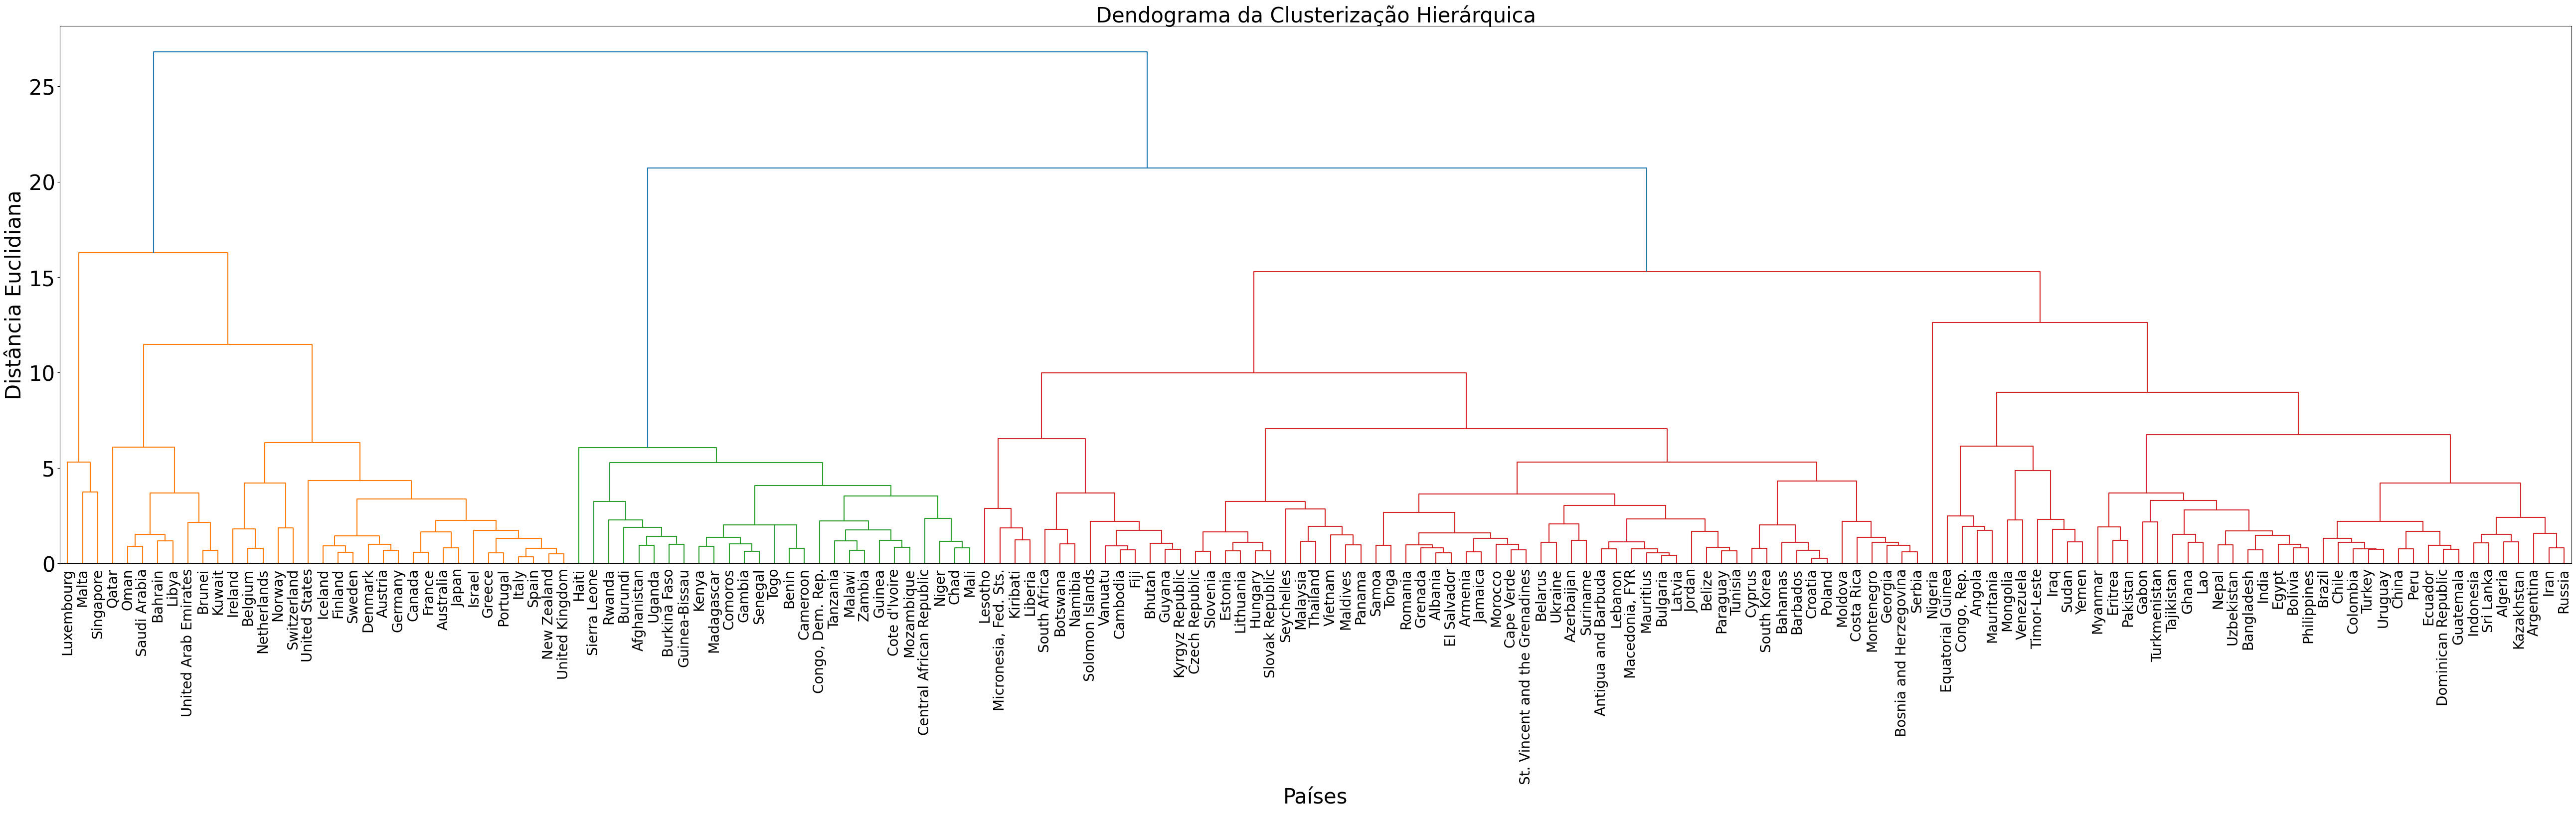

In [32]:
# Dendograma
plt.figure(figsize=(65, 14))
plt.rcParams.update({'font.size': 30})
dendrogram(linked, labels=df['country'].values, leaf_rotation=90, leaf_font_size=20)
plt.title('Dendograma da Clusterização Hierárquica', fontsize=30)
plt.xlabel('Países', fontsize=30)
plt.ylabel('Distância Euclidiana', fontsize=30)
plt.show()

4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
   > A clusterização hierárquica, por meio do dendrograma, mostra visualmente a relação hierárquica entre os países, o que não é possível com o K-Médias, devido a suas múltiplas dimensões (na maioria dos casos reais).
   > 
   > ?????

# Parte 4 Escolha de algoritmos
1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
> * Inicialização dos centróides.
> * Atribuição de cada ponto ao centróide mais próximo.
> * Recalcular a posição dos centróides.
> * Repetir até a convergência (quando a mudança dos centróides entre iterações for nula ou mínima, dentro de um parâmetro previamente estabelecido).

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [37]:
# Medóide
kmedoids = KMedoids(n_clusters=3, random_state=42)
y_vars_m = kmedoids.fit_predict(df_scaled)
X_vars['Cluster_Medoid'] = kmedoids.labels_

In [38]:
# Analisando a distribuição dos clusters (K-Medoides)
cluster_counts = X_vars['Cluster_Medoid'].value_counts()
print("Distribuição dos clusters (K-Medóide):")
print(cluster_counts)

Distribuição dos clusters (K-Medóide):
Cluster_Medoid
0    75
1    47
2    45
Name: count, dtype: int64


In [39]:
# Analisando a distribuição das dimensões em cada grupo (K-Medoides)
cluster_means = X_vars.groupby('Cluster_Medoid').mean()
print("Distribuição das dimensões em cada grupo (K-Medóide):")
print(cluster_means)

Distribuição das dimensões em cada grupo (K-Medóide):
                child_mort    exports    health    imports        income  \
Cluster_Medoid                                                             
0                11.738667  57.033333  7.368267  57.673333  28786.266667   
1                92.961702  29.151277  6.388511  42.323404   3942.404255   
2                25.366667  27.057533  6.340889  33.688131  11531.111111   

                inflation  life_expec  total_fer          gdpp  
Cluster_Medoid                                                  
0                3.915533   76.390667   1.958800  23454.746667  
1               12.019681   59.187234   5.008085   1922.382979  
2                9.799467   72.704444   2.444889   7012.355556  


3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
> O K-Médias é sensível a outliers porque os centróides são afetados por valores extremos, o que pode distorcer a posição dos clusters, já que utiliza médias

4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?
> O algoritmo DBScan é mais robusto porque não exige o número de clusters a priori e é capaz de identificar pontos que não se ajustam a nenhum cluster, classificando-os como ruído.

# Gráficos extras
## K-Médias

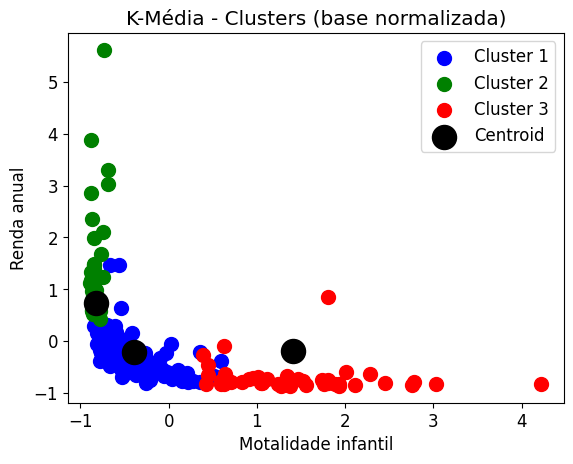

In [44]:
# Visualizando o resultado do K-Média
X = df_scaled
plt.scatter(X[y_vars == 0, 0], X[y_vars == 0, 4], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_vars == 1, 0], X[y_vars == 1, 4], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_vars == 2, 0], X[y_vars == 2, 4], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 2], s = 300, c = 'black', label = 'Centroid') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Média - Clusters (base normalizada)')
plt.xlabel('Motalidade infantil')
plt.ylabel('Renda anual')
plt.legend()
plt.show()

## K-Medoides

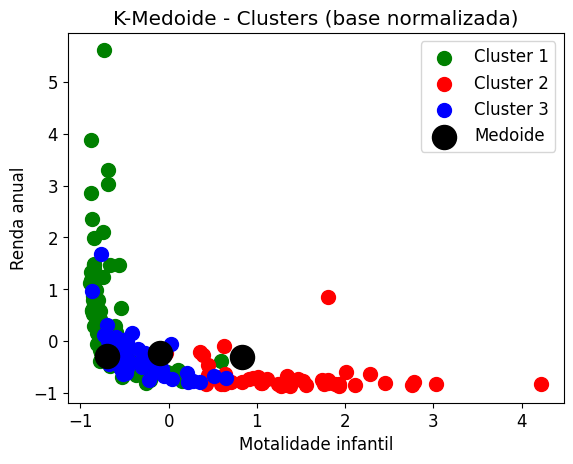

In [47]:
# Visualizando o resultado
X = df_scaled
plt.scatter(X[y_vars_m == 0, 0], X[y_vars_m == 0, 4], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_vars_m == 1, 0], X[y_vars_m == 1, 4], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_vars_m == 2, 0], X[y_vars_m == 2, 4], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 2], s = 300, c = 'black', label = 'Medoide') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Medoide - Clusters (base normalizada)')
plt.xlabel('Motalidade infantil')
plt.ylabel('Renda anual')
plt.legend()
plt.show()